# Two linearly-coupled Duffing resonators

In [1]:
using HarmonicBalance

┌ Info: Precompiling HarmonicBalance [e13b9ff6-59c3-11ec-14b1-f3d2cc6c135e]
└ @ Base loading.jl:1423


In [2]:
@variables ω_x, ω_y, t, T, ω, ψ, F, γ, Δω, α1, α2, k; # constant parameters
@variables x(t), y(t); # functions

In [3]:
# define equation of motion

diff_eq = [ d(d(x, t),t) + ω_x^2 * x + γ*d(x,t) + α1*x^3 - k*y, 
                    d(d(y,t),t) + ω_y^2*y + γ*d(y,t) + α2*y^3 - k*x] - [F*cos(ω*t), 0]

dEOM = DifferentialEquation(diff_eq, [x, y])

add_harmonic!(dEOM, x, ω) # x oscillates at ω
add_harmonic!(dEOM, x, 3*ω) # x also oscillates at 3*ω
add_harmonic!(dEOM, y, 3*ω) # y oscillates at 3*ω

System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ω, 3ω;   y(t) => 3ω;   

α1*(x(t)^3) + (ω_x^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) - k*y(t) - F*cos(t*ω) ~ 0
α2*(y(t)^3) + γ*Differential(t)(y(t)) + (ω_y^2)*y(t) + Differential(t)(Differential(t)(y(t))) - k*x(t) ~ 0


In [4]:
@time harmonic_eqs = get_harmonic_equations(dEOM, slow_time=T, fast_time=t)

107.458933 seconds (149.46 M allocations: 8.277 GiB, 2.77% gc time, 98.40% compilation time)


A set of 6 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T), u3(T), v3(T)
Parameters: α1, ω, ω_x, γ, k, F, α2, ω_y

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(3ωt) + v2(T)*sin(3ωt)
y(t) = u3(T)*cos(3ωt) + v3(T)*sin(3ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω_x^2)*u1(T) + (3//4)*α1*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α1*(u1(T)^2)*u2(T) + (3//4)*α1*(v1(T)^2)*u1(T) + (3//2)*α1*(u2(T)^2)*u1(T) + (3//2)*α1*(v2(T)^2)*u1(T) + (3//2)*α1*u1(T)*v1(T)*v2(T) - F - (ω^2)*u1(T) - (3//4)*α1*(v1(T)^2)*u2(T) ~ 0

(ω_x^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α1*(v1(T)^3) + (3//4)*α1*(u1(T)^2)*v1(T) + (3//4)*α1*(u1(T)^2)*v2(T) + (3//2)*α1*(u2(T)^2)*v1(T) + (3//2)*α1*(v2(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (3//4)*α1*(v1(T)^2)*v2(T) - γ*ω*u1(T) - (3//2)*α1*u1(T)*u2(T)*v1(T) ~ 0

(ω_x^2)*u2(T) + γ*Differential(T)(u2(T)) + (1//4)*α1*(u1(T)^3) + (3//4)*α1*(u2(T)^3) + (6//1)*ω*Differential(T)(v2(T)) + (3//2

# solving the algebraic equations

In [5]:
fixed = (ω_x => 1, ω_y => 2.95, γ => 8E-3, F => 3E-2, ψ => 0, α1 => 2E-2, α2 => 10, k => 1)
range = ω => LinRange(0.98, 1.1,200)

@time soln = HarmonicBalance.get_steady_states(harmonic_eqs, range, fixed, random_warmup=true)

Solving for 200 parameters... 100%|█████████████████████| Time: 0:00:00
  # parameters solved:  200
  # paths tracked:      1600
146.492029 seconds (140.50 M allocations: 7.442 GiB, 2.00% gc time, 95.76% compilation time)


A steady state result for 200 parameter points

Solution branches:   7
   of which real:    7
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


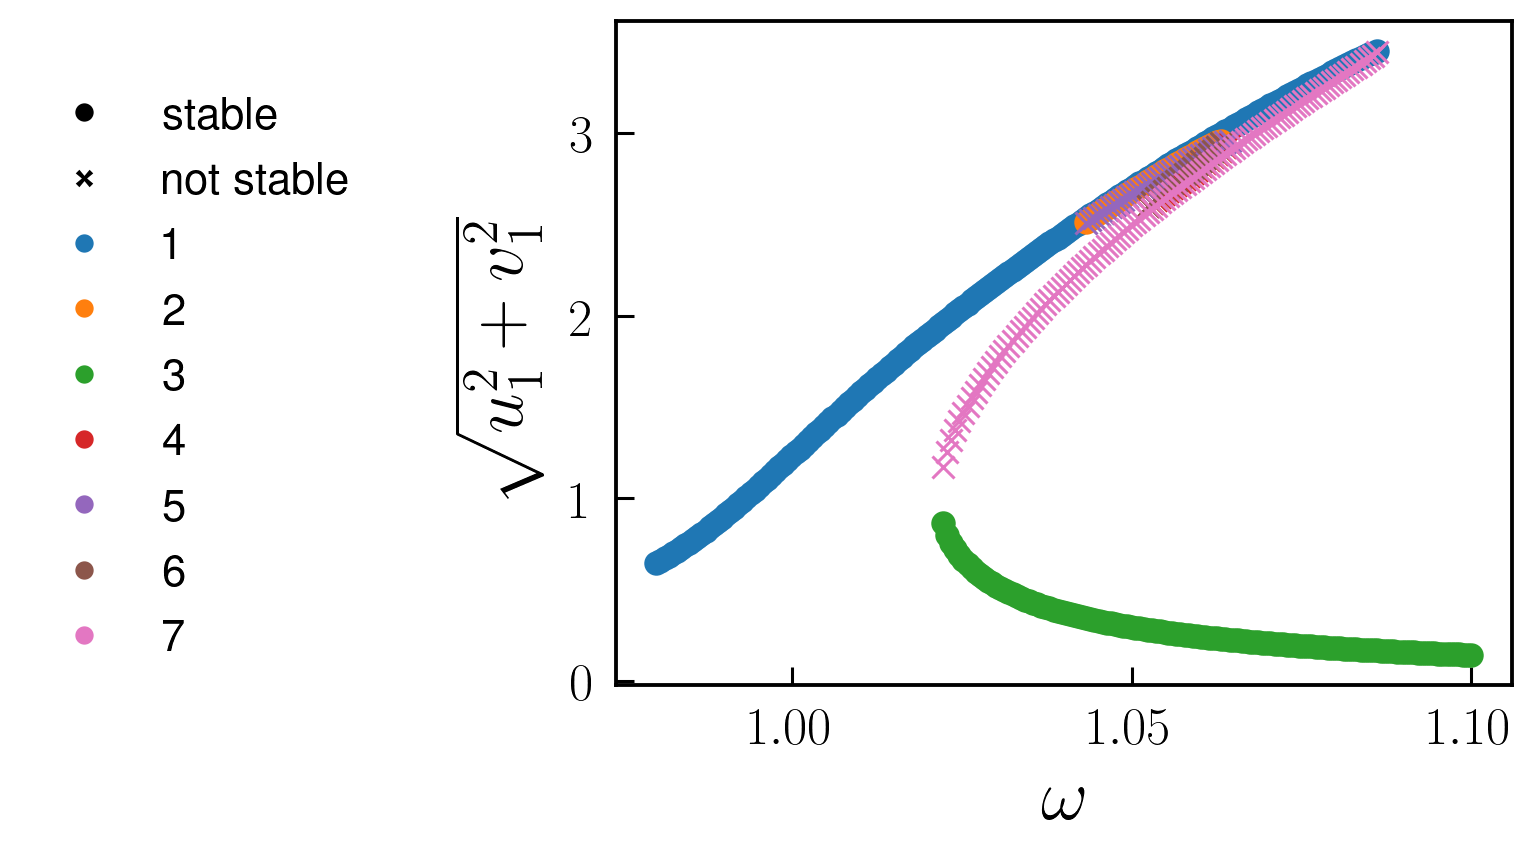

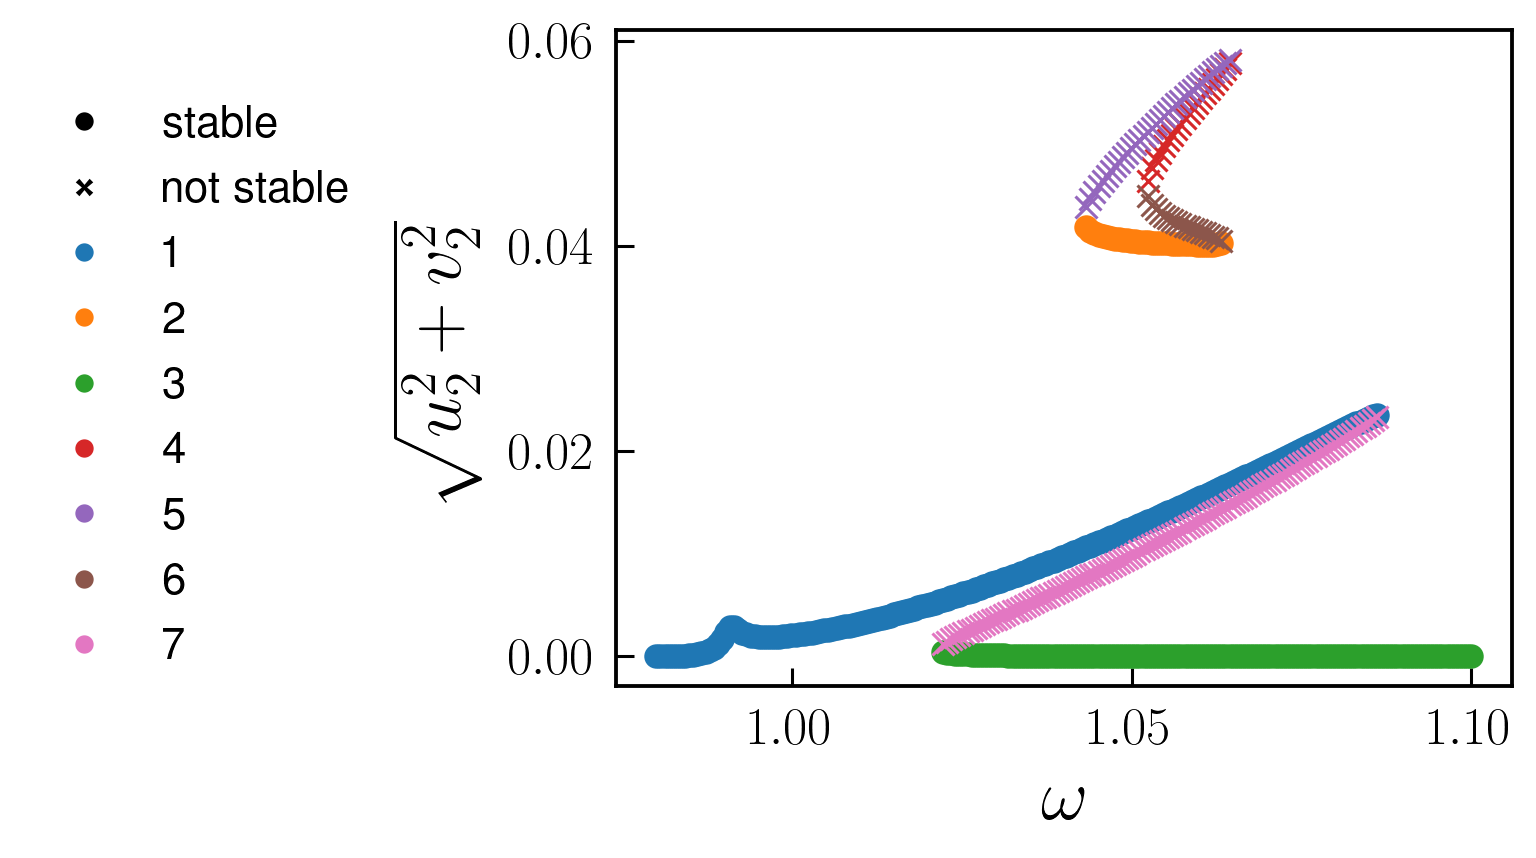

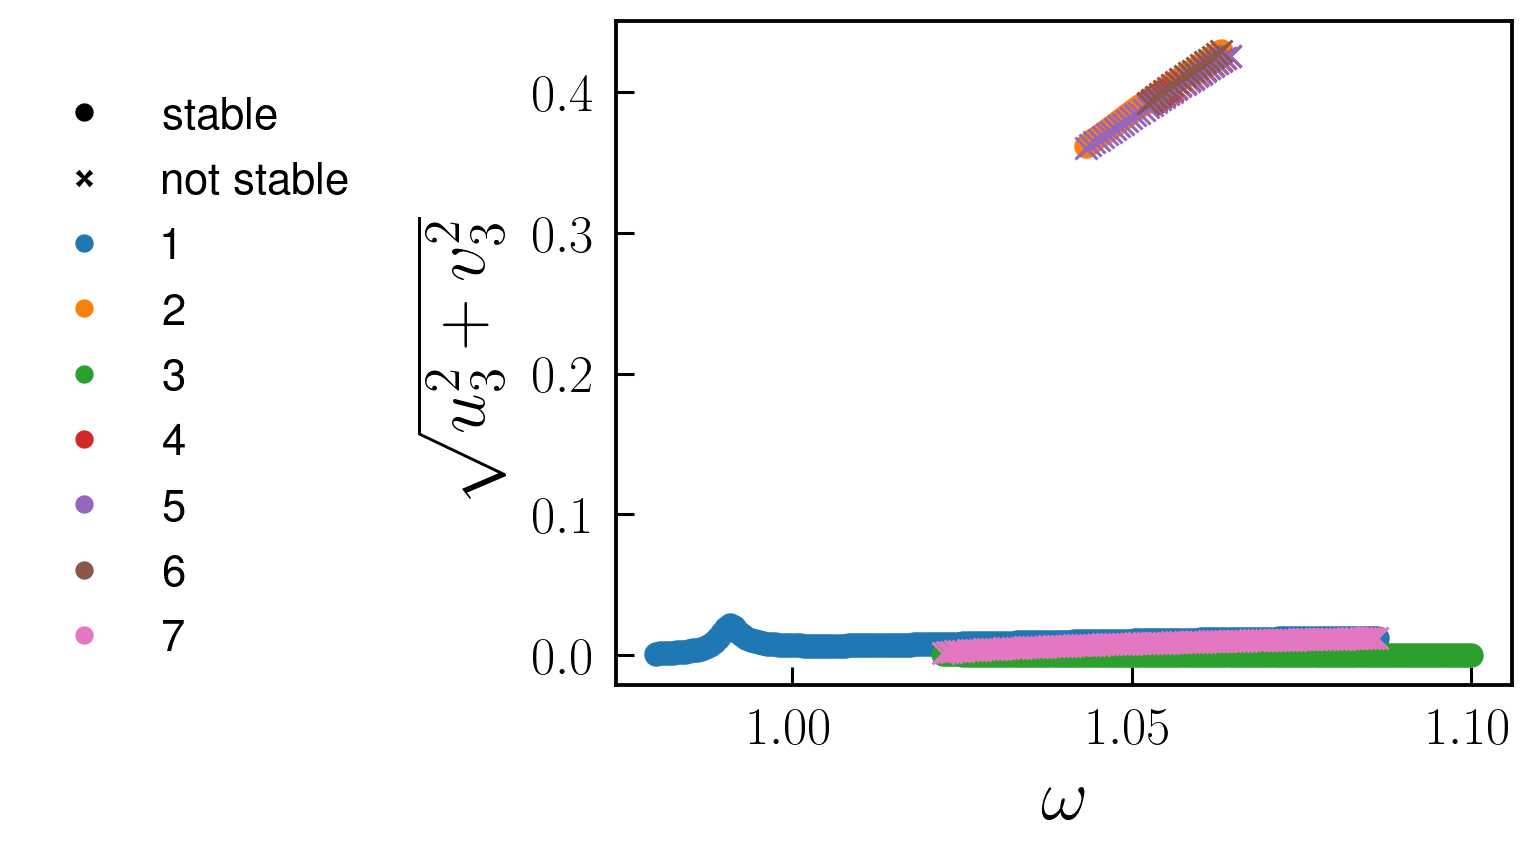

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [6]:
# resonator 1, amplitude at ω
plt = plot(soln, x="ω", y="sqrt(u1^2 + v1^2)");

# resonator 1, amplitude at 3ω
plt = plot(soln, x="ω", y="sqrt(u2^2 + v2^2)");

# resonator 2, amplitude at 3ω
plt = plot(soln, x="ω", y="sqrt(u3^2 + v3^2)");

# fluctuation spectra

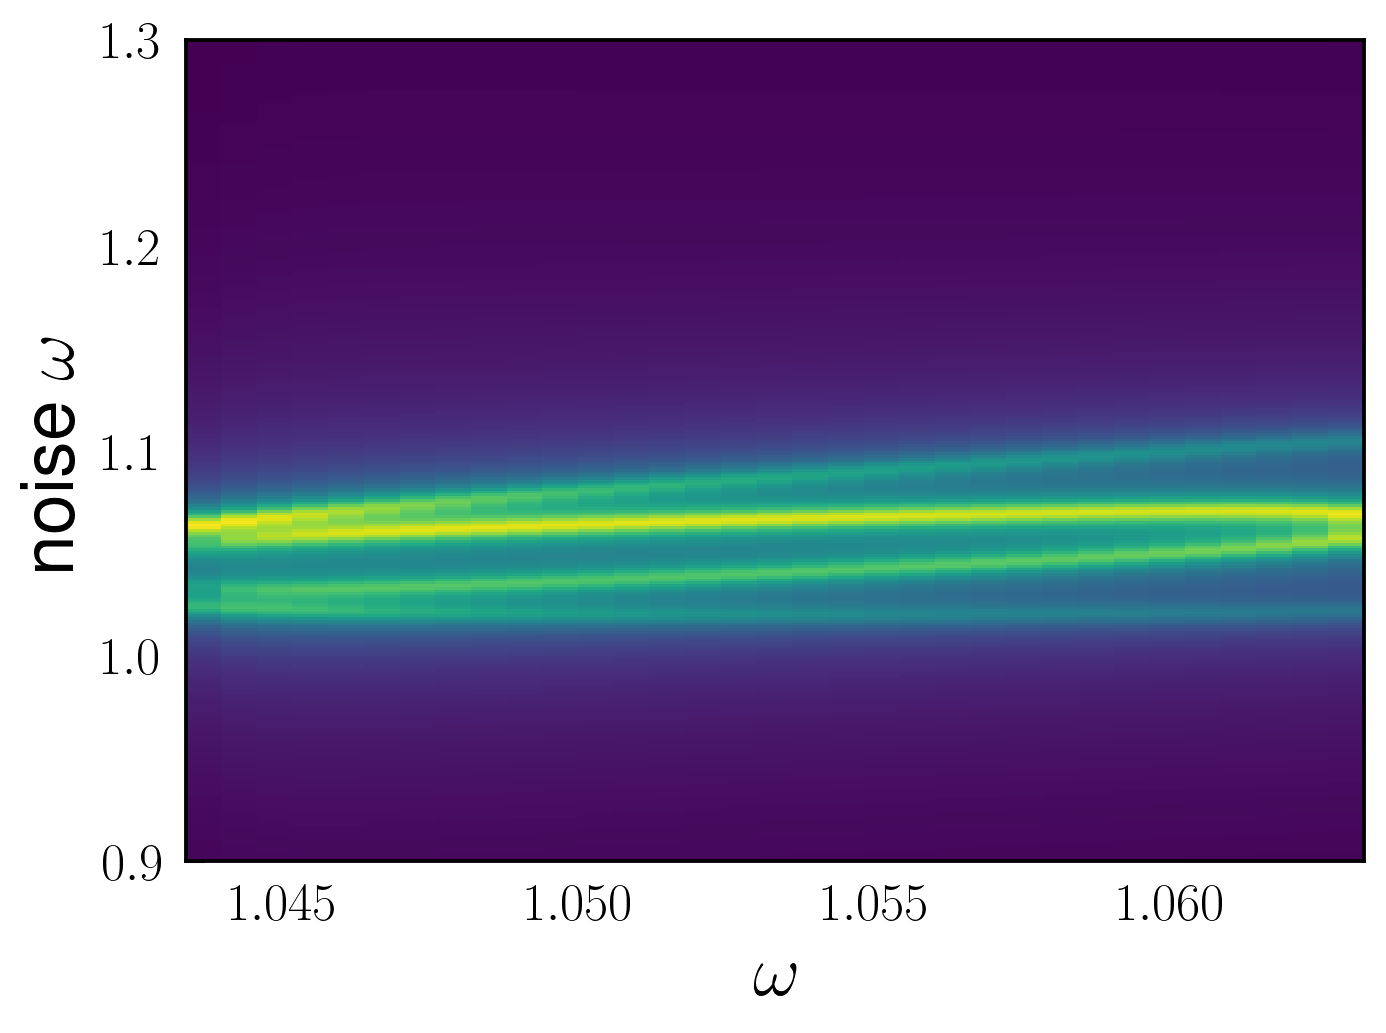

In [7]:
# select a branch 
branch = 2
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(soln, x, Ω_range=LinRange(0.9,1.3,300), branch=branch);